# Poisson's equation

Now extend your solver to solve for Poisson's equation.
* Consider a 64 x 64 grids in a domain ($-1<x<1$ and $-1<y<1$)
* Assume $\rho(r)= \exp(-10r)$
* Assume $u$ is zero on the four boundaries.
* Solver for the potential $u$.
* What is the corresponding electrical (or gravitational) field? (Hints: use `numpy.gradient()`)

In [2]:
import numpy as np
from scipy.sparse import dia_array  # if dia_array is not able, use dia_matrix
from scipy.sparse import dia_matrix
from scipy.sparse import csc_matrix
import scipy.sparse.linalg as splinalg
from numba import jit, njit, prange
import matplotlib.pyplot as plt

In [3]:
# Copy your Laplace's Equation solver from demo1 here

def generate_the_laplace_matrix_with_size(N=4):
    """
    assume sqrt(N) is an integer.

    """
    nsq = N*N
    A   = np.zeros((nsq,nsq))
    
    # TODO
    for i in range(N):
        for j in range(N):
            index = i * N + j  
            A[index, index] = 4
            if j > 0:
                A[index, index - 1] = -1
            if j < N - 1:
                A[index, index + 1] = -1
            if i > 0:
                A[index, index - N] = -1
            if i < N - 1:
                A[index, index + N] = -1

    return A

def convert_solution(x):
    usize = np.sqrt(len(x))
    u = x.reshape(int(usize),int(usize)).transpose()
    return u




The right hand side vector need to be updated when there is a density field $\rho$.
First, we write a function `generate_rho()` to generate the $N \times N$ density field.

In [4]:
def generate_rho(N, xmin=-1, xmax=1, ymin=-1,ymax=1):

    x = np.linspace(xmin, xmax, N, endpoint = True)
    y = np.linspace(ymin, ymax, N, endpoint = True)
    X, Y = np.meshgrid(x, y)
    r = np.sqrt(X**2 + Y**2)
    rho = np.exp(-10 * r)
    
    return rho

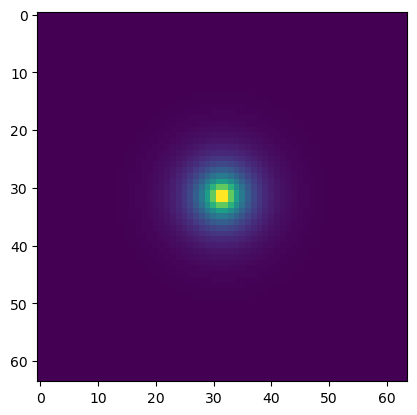

In [5]:
# Visualize the density field
rho = generate_rho(N=64)
plt.imshow(rho)

Once we have the density filed, we need to modify the `generate_the_rhs_vector_with_size()` to include the density field.

In [6]:
def generate_the_rhs_vector_with_size(N=4, rho=None, dx=1):
    b = np.zeros(N**2)
    #TODO:
    if rho is not None:
      b = -rho.flatten() * dx**2
    else:
      b[-N:] = 1
    return b




We could solve the system by the same way in `solve_laplace()`.

In [7]:
def solve_laplace(N=16):
    A = generate_the_laplace_matrix_with_size(N=N)

    rho = generate_rho(N=N)
    b = generate_the_rhs_vector_with_size(N=N, rho=rho, dx=2/(N-1))
    #x = linalg.solve(A,b) # use scipy
    #x = lu_solve(A,b)      # use our solver
    x = splinalg.spsolve(A,b) # use scipy sparse solver
    u = convert_solution(x)
    return u

In [8]:
u = solve_laplace(N=64)

C:\Users\yqiu7\AppData\Local\Temp\ipykernel_19956\3917867856.py:8: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x = splinalg.spsolve(A,b) # use scipy sparse solver


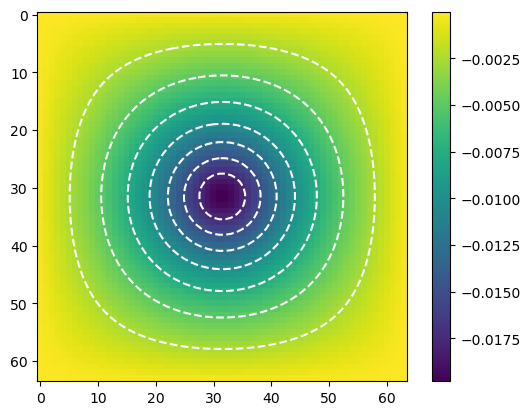

In [9]:
# # Visualize the solution
plt.imshow(u)
plt.colorbar()
plt.contour(u,colors="w")

# plt.figure(2, figsize=(6,6))
# plt.pcolormesh(xx,yy,u)
# plt.colorbar()
# #plt.contour(xx,yy, u,10, colors="w")
# plt.axis('equal')
# plt.xlim(-1,1)
# plt.ylim(-1,1)
# plt.show()

Calculate the gravitational field

In [10]:
phi =np.gradient(u)

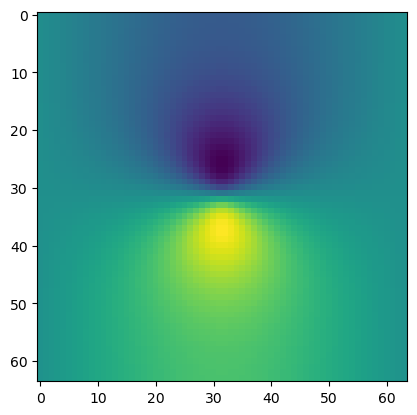

In [11]:
plt.imshow(phi[0]) # x derivative

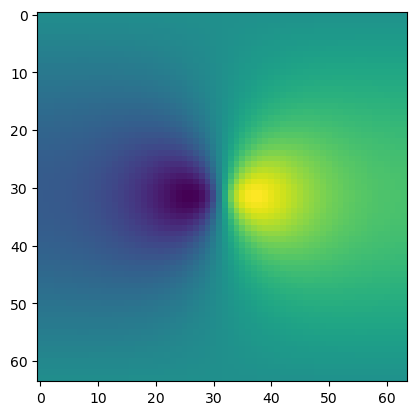

In [12]:
plt.imshow(phi[1]) # y derivative